## Train a simple convnet on the Fashion MNIST dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [0]:
import tensorflow as tf

import keras

from keras.models import Sequential
from keras.optimizers import SGD
from keras import regularizers
from keras import optimizers

from keras.layers import Reshape, Dense, Flatten, Dropout,MaxPooling2D, BatchNormalization, Convolution2D

from keras.datasets import cifar10

In [0]:

tf.set_random_seed(42)

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [61]:
print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) 
y_train shape: (60000,)


In [62]:
print("x_test shape:", x_test.shape, "\ny_test shape:", y_test.shape)

x_test shape: (10000, 28, 28) 
y_test shape: (10000,)


### Find dimensions of an image in the dataset

In [63]:
print("Dimension of train images",x_train.shape[1:3])
print("Dimension of test images",x_test.shape[1:3])

Dimension of train images (28, 28)
Dimension of test images (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils

In [0]:
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

### Import the necessary layers from keras to build the model

In [0]:
from __future__ import absolute_import, division, print_function
import pickle
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [68]:
from keras.layers import Activation

BATCH_SIZE = 32
EPOCHS = 10

model2 = Sequential()

    # 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

    # 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

    # Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

    # Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

    # Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]
    
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.3750 - acc: 0.8651 - val_loss: 0.2945 - val_acc: 0.8926
Epoch 2/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.2318 - acc: 0.9147 - val_loss: 0.2574 - val_acc: 0.9081
Epoch 3/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.1688 - acc: 0.9375 - val_loss: 0.2469 - val_acc: 0.9110
Epoch 4/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.1184 - acc: 0.9564 - val_loss: 0.2602 - val_acc: 0.9120
Epoch 5/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0770 - acc: 0.9716 - val_loss: 0.3095 - val_acc: 0.9084
Epoch 6/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0497 - acc: 0.9822 - val_loss: 0.3579 - val_acc: 0.9151
Epoch 7/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0376 - acc: 0.9866 - val_loss: 0.

In [69]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 80us/step
[0.5063698126263917, 0.9103]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [70]:
model3 = Sequential()

    # 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

    # 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

    # Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
model3.add(Dropout(0.25))

    # Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
    
    # More Dropout
model3.add(Dropout(0.25))

    # Prediction Layer
model3.add(Dense(10))
model3.add(Activation('softmax'))

    # Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
callback_list = [early_stopping]

    # Train the model

model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.4194 - acc: 0.8492 - val_loss: 0.3137 - val_acc: 0.8858
Epoch 2/10
60000/60000 [==============================] - 17s 292us/step - loss: 0.2782 - acc: 0.8982 - val_loss: 0.2548 - val_acc: 0.9060
Epoch 3/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.2355 - acc: 0.9124 - val_loss: 0.2310 - val_acc: 0.9168
Epoch 4/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.2058 - acc: 0.9238 - val_loss: 0.2228 - val_acc: 0.9190
Epoch 5/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.1828 - acc: 0.9323 - val_loss: 0.2234 - val_acc: 0.9209
Epoch 6/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.1651 - acc: 0.9376 - val_loss: 0.2174 - val_acc: 0.9256
Epoch 7/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.1485 - acc: 0.9432 - val_loss: 0.

In [71]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 89us/step
[0.23327994160205126, 0.9314]


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

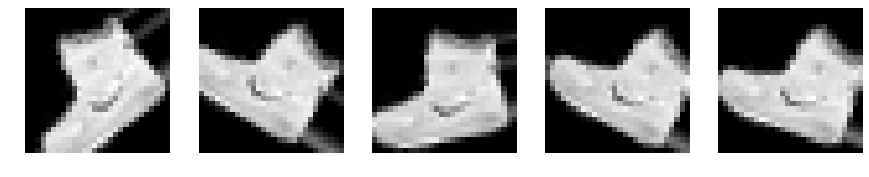

In [73]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [74]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=BATCH_SIZE),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=EPOCHS,
                        validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.8519 - acc: 0.6935 - val_loss: 0.3405 - val_acc: 0.8834
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.6167 - acc: 0.7720 - val_loss: 0.3295 - val_acc: 0.8884
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5556 - acc: 0.7942 - val_loss: 0.3387 - val_acc: 0.8826
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5203 - acc: 0.8072 - val_loss: 0.3323 - val_acc: 0.8865
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4958 - acc: 0.8168 - val_loss: 0.3226 - val_acc: 0.8880
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4787 - acc: 0.8235 - val_loss: 0.3215 - val_acc: 0.8850
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4639 - acc: 0.8289 - val_loss: 0.3400 - val_acc: 0.8760
Epoch 8/10
1875/1875 [==========================

In [75]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 90us/step
[0.33629321621656416, 0.8819]


###  Report the final train and validation accuracy

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [0]:
#from keras.datasets import cifar10

In [0]:
(x_train, y_train_num), (x_test, y_test_num) = cifar10.load_data()


In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train_num.shape)
print(y_test_num.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [79]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train_num, 10)
y_test = np_utils.to_categorical(y_test_num, 10)

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [ ]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

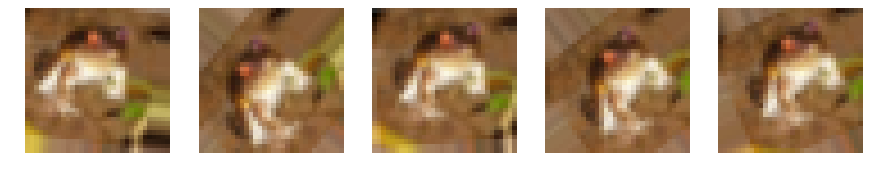

In [81]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()